In [27]:
import pandas as pd
traindata = pd.read_csv("train_values.csv",sep=',')
traindata.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [28]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
%matplotlib inline

In [29]:
traindata.columns[traindata.isna().any()]

Index([], dtype='object')

In [30]:
data=traindata
data.drop(['building_id'], axis=1, inplace=True)
data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0


In [31]:
trainlabels = pd.read_csv("train_labels.csv",sep=',')
trainout=trainlabels
trainout.drop(['building_id'], axis=1, inplace=True)
trainout.head()

,damage_grade
0,3
1,2
2,3
3,2
4,3


In [32]:
testvalues = pd.read_csv("test_values.csv",sep=',')
testdata=testvalues
testdata.drop(['building_id'], axis=1, inplace=True)
testdata.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,17,596,11307,3,20,7,6,t,r,n,...,0,0,0,0,0,0,0,0,0,0
1,6,141,11987,2,25,13,5,t,r,n,...,1,0,0,0,0,0,0,0,0,0
2,22,19,10044,2,5,4,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
3,26,39,633,1,0,19,3,t,r,x,...,0,0,1,0,0,0,0,0,0,0
4,17,289,7970,3,15,8,7,t,r,q,...,0,0,0,0,0,0,0,0,0,0


In [33]:
###preprocess traindata

In [34]:
data["land_surface_condition"].value_counts()

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

In [35]:
cleanup_letters = {"land_surface_condition": {"n": 1, "o": 2, "t":3},
                "foundation_type": {"h": 1, "i": 2, "r": 3, "u": 4, "w": 5},               
                "roof_type": {"n": 1, "q": 2, "x": 3},
                "ground_floor_type": {"f": 1, "m": 2, "v": 3, "x": 4, "z": 5},
                "other_floor_type": {"j": 1, "q": 2, "s": 3, "x": 4},
                "position": {"j": 1, "o": 2, "s": 3, "t": 4},
                "plan_configuration": {"a": 1, "c": 2, "d": 3, "f": 4, "m": 5, "n": 6, "o": 7, "q": 8, "s": 9, "u":10},
                "legal_ownership_status": {"a": 1, "r": 2, "v": 3, "w": 4}             
               }

In [36]:
data.replace(cleanup_letters, inplace=True)
data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,6,487,12198,2,30,6,5,3,3,1,...,0,0,0,0,0,0,0,0,0,0
1,8,900,2812,2,10,8,7,2,3,1,...,0,0,0,0,0,0,0,0,0,0
2,21,363,8973,2,10,5,5,3,3,1,...,0,0,0,0,0,0,0,0,0,0
3,22,418,10694,2,10,6,5,3,3,1,...,0,0,0,0,0,0,0,0,0,0
4,11,131,1488,3,30,8,9,3,3,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
data.dtypes

geo_level_1_id                            int64
geo_level_2_id                            int64
geo_level_3_id                            int64
count_floors_pre_eq                       int64
age                                       int64
area_percentage                           int64
height_percentage                         int64
land_surface_condition                    int64
foundation_type                           int64
roof_type                                 int64
ground_floor_type                         int64
other_floor_type                          int64
position                                  int64
plan_configuration                        int64
has_superstructure_adobe_mud              int64
has_superstructure_mud_mortar_stone       int64
has_superstructure_stone_flag             int64
has_superstructure_cement_mortar_stone    int64
has_superstructure_mud_mortar_brick       int64
has_superstructure_cement_mortar_brick    int64
has_superstructure_timber               

In [38]:
a = list(data)
del a[-1]
a

['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'legal_ownership_status',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_sec

In [39]:
x = data[a].values
y = trainout['damage_grade'].values

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
clf = RandomForestClassifier(n_estimators=50,max_features=37)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=37, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
testdata.replace(cleanup_letters, inplace=True)
testdata.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,17,596,11307,3,20,7,6,3,3,1,...,0,0,0,0,0,0,0,0,0,0
1,6,141,11987,2,25,13,5,3,3,1,...,1,0,0,0,0,0,0,0,0,0
2,22,19,10044,2,5,4,5,3,3,1,...,0,0,0,0,0,0,0,0,0,0
3,26,39,633,1,0,19,3,3,3,3,...,0,0,1,0,0,0,0,0,0,0
4,17,289,7970,3,15,8,7,3,3,2,...,0,0,0,0,0,0,0,0,0,0


In [17]:
test=testdata[a].values

In [43]:
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve, GridSearchCV
import numpy as np
#from sklearn.cross_validation import cross_val_score
clf = RandomForestClassifier(n_estimators=50,max_features=37)
params = {'class_weight':[{0:neg_weight, 1:1} for neg_weight in np.arange(1.0, 5.0, 0.5)]}
gs = GridSearchCV(estimator=clf, param_grid=params, cv=5)
gs.fit(x_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Class label 0 not present.

In [18]:
y_pred=clf.predict(x_test)

In [19]:
df=pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [20]:
df

,actual,predicted
0,2,2
1,3,2
2,2,2
3,2,3
4,3,2
5,2,2
6,1,2
7,2,2
8,3,3
9,2,2


In [19]:
acc=clf.score(x_test,y_test)
acc

0.7200168837896433

In [20]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred,average='weighted')
f1

0.7166199405716859

In [27]:
feature_importances = [(feature, importance) for feature,importance in zip(a, clf.feature_importances_)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: geo_level_1_id       Importance: 0.15554796456120756
Variable: geo_level_3_id       Importance: 0.1407459924535083
Variable: age                  Importance: 0.12859435906658667
Variable: geo_level_2_id       Importance: 0.12237944718415475
Variable: area_percentage      Importance: 0.11782284543166066
Variable: height_percentage    Importance: 0.05867291742494098
Variable: has_superstructure_mud_mortar_stone Importance: 0.028547368511408884
Variable: position             Importance: 0.02692054861738106
Variable: count_families       Importance: 0.025787416278027782
Variable: roof_type            Importance: 0.022025893801222992
Variable: other_floor_type     Importance: 0.020196146041835835
Variable: count_floors_pre_eq  Importance: 0.018077062013328173
Variable: land_surface_condition Importance: 0.018054997881323757
Variable: foundation_type      Importance: 0.017761778310534607
Variable: ground_floor_type    Importance: 0.014265410081873224
Variable: has_superstructure_ti

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

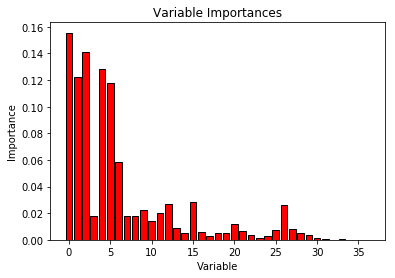

In [28]:
x_values = list(range(len(clf.feature_importances_)))
plt.bar(x_values, clf.feature_importances_, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.0)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [29]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
sfm = SelectFromModel(clf, threshold=0.00024846532679632954)

sfm.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=37, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        max_features=None, norm_order=1, prefit=False,
        threshold=0.00024846532679632954)

In [30]:
for feature_list_index in sfm.get_support(indices=True):
    print(a[feature_list_index])

geo_level_1_id
geo_level_2_id
geo_level_3_id
count_floors_pre_eq
age
area_percentage
height_percentage
land_surface_condition
foundation_type
roof_type
ground_floor_type
other_floor_type
position
plan_configuration
has_superstructure_adobe_mud
has_superstructure_mud_mortar_stone
has_superstructure_stone_flag
has_superstructure_cement_mortar_stone
has_superstructure_mud_mortar_brick
has_superstructure_cement_mortar_brick
has_superstructure_timber
has_superstructure_bamboo
has_superstructure_rc_non_engineered
has_superstructure_rc_engineered
has_superstructure_other
legal_ownership_status
count_families
has_secondary_use
has_secondary_use_agriculture
has_secondary_use_hotel
has_secondary_use_rental
has_secondary_use_industry


In [31]:
x_important_train = sfm.transform(x_train)
x_important_test = sfm.transform(x_test)

In [32]:
clf_important = RandomForestClassifier(n_estimators=50, max_features=25,random_state=0, n_jobs=-1)
clf_important.fit(x_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=25, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [33]:
y_important_pred = clf_important.predict(x_important_test)
accuracy_score(y_test, y_important_pred)

0.7222808464918171

In [34]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_important_pred,average='weighted')
f1

0.7185385994348228